# Import & download

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import string
import os

In [2]:
# клонируем репозиторий с моделью
!git clone https://github.com/clovaai/deep-text-recognition-benchmark

Cloning into 'deep-text-recognition-benchmark'...
remote: Enumerating objects: 495, done.
remote: Total 495 (delta 0), reused 0 (delta 0), pack-reused 495
Receiving objects: 100% (495/495), 3.07 MiB | 15.32 MiB/s, done.
Resolving deltas: 100% (301/301), done.


In [3]:
!pip install pip install python-Levenshtein
!pip install jiwer

     |████████████████████████████████| 50 kB 3.0 MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149865 sha256=19e64810f0477282c24bd61dbbe8441e9b324fd8656e7f701c33ec245086859a
  Stored in directory: /root/.cache/pip/wheels/05/5f/ca/7c4367734892581bb5ff896f15027a932c551080b2abd3e00d
Successfully built python-Levenshtein


In [4]:
import Levenshtein as leven
import jiwer

In [1]:
!pip install pytesseract
!sudo apt install tesseract-ocr

  Created wheel for pytesseract: filename=pytesseract-0.3.8-py2.py3-none-any.whl size=14072 sha256=01e8171209f810539beb6322fced4a26822a6f3bc0a196aae5ec001df8e6db1f
  Stored in directory: /root/.cache/pip/wheels/a4/89/b9/3f11250225d0f90e5454fcc30fd1b7208db226850715aa9ace
Successfully built pytesseract
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 37 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http:/

In [8]:
import pytesseract

Next, download large model files from Google Drive, using hack: https://stackoverflow.com/questions/20665881/direct-download-from-google-drive-using-google-drive-api/32742700#32742700

In [9]:
models = {
    'None-ResNet-None-CTC.pth': 'https://drive.google.com/open?id=1FocnxQzFBIjDT2F9BkNUiLdo1cC3eaO0',
    'None-VGG-BiLSTM-CTC.pth': 'https://drive.google.com/open?id=1GGC2IRYEMQviZhqQpbtpeTgHO_IXWetG',
    'None-VGG-None-CTC.pth': 'https://drive.google.com/open?id=1FS3aZevvLiGF1PFBm5SkwvVcgI6hJWL9',
    'TPS-ResNet-BiLSTM-Attn-case-sensitive.pth': 'https://drive.google.com/open?id=1ajONZOgiG9pEYsQ-eBmgkVbMDuHgPCaY',
    'TPS-ResNet-BiLSTM-Attn.pth': 'https://drive.google.com/open?id=1b59rXuGGmKne1AuHnkgDzoYgKeETNMv9',
    'TPS-ResNet-BiLSTM-CTC.pth': 'https://drive.google.com/open?id=1FocnxQzFBIjDT2F9BkNUiLdo1cC3eaO0',
}

for k, v in models.items():
  doc_id = v[v.find('=')+1:]
  !curl -c /tmp/cookies "https://drive.google.com/uc?export=download&id=$doc_id" > /tmp/intermezzo.html
  !curl -L -b /tmp/cookies "https://drive.google.com$(cat /tmp/intermezzo.html | grep -Po 'uc-download-link" [^>]* href="\K[^"]*' | sed 's/\&amp;/\&/g')" > $k

!ls -al *.pth

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3286    0  3286    0     0  15212      0 --:--:-- --:--:-- --:--:-- 15283
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0   2358      0 --:--:-- --:--:-- --:--:--  2358
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  186M  100  186M    0     0  73.4M      0  0:00:02  0:00:02 --:--:--  102M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   388    0   388    0     0    279      0 --:--:--  0:00:01 --:--:--   279
  % Total    % Received % Xferd  Average Speed   Tim

In [15]:
!gdown --id 1rkPjMiluQjF3q4bRah5GpnG46VI2y40p # download images of words

Downloading...
From: https://drive.google.com/uc?id=1rkPjMiluQjF3q4bRah5GpnG46VI2y40p
To: /content/words.tgz
100% 821M/821M [00:04<00:00, 169MB/s]


In [16]:
os.makedirs('words/')
!tar -xzf "/content/words.tgz" -C "/content/words"   #[run this cell to extract tar.gz files]

In [17]:
!gdown --id 1D9P1Bx1nXriKjAHOO-z3PVLu16fM6SO1 # download xml labelings

Downloading...
From: https://drive.google.com/uc?id=1D9P1Bx1nXriKjAHOO-z3PVLu16fM6SO1
To: /content/xml.tgz
100% 6.05M/6.05M [00:00<00:00, 36.9MB/s]


In [18]:
os.makedirs('xml/')
!tar -xzf "/content/xml.tgz" -C "/content/xml/"   

# Form IAM dataset

In [19]:
import xml.etree.ElementTree as ET
import glob
d = {'file': [], 'word': []}

for xml_file in sorted(glob.glob('/content/xml/*')):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    for member in root.iter('word'):
        line = member.attrib['id']
        d['file'].append(member.attrib['id'] + '.png')
        d['word'].append(member.attrib['text'])

In [20]:
import re
import string
p = re.compile("[" + re.escape(string.punctuation) + "]")

words_df = pd.DataFrame(d)
words_df = words_df[~words_df['word'].str.contains(p)]
words_df['word'] = words_df['word'].str.lower()
words_df.reset_index(drop=True, inplace=True)
words_df.head()

,file,word
0,a01-000u-00-00.png,a
1,a01-000u-00-01.png,move
2,a01-000u-00-02.png,to
3,a01-000u-00-03.png,stop
4,a01-000u-00-05.png,gaitskell


In [21]:
# удалим "битые" файлы
idx_to_drop = words_df[words_df['file'] == 'a01-117-05-02.png'].index
words_df.drop(idx_to_drop, inplace=True)
idx_to_drop = words_df[words_df['file'] == 'r06-022-03-05.png'].index
words_df.drop(idx_to_drop, inplace=True)

In [22]:
train_df = words_df.iloc[:78384]
valid_df = words_df.iloc[78384:]

In [23]:
def preprocess_and_save(image_dir, save_dir, txt_line, txt_dir):
    image = cv2.imread(image_dir)
    try:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        gray = cv2.GaussianBlur(gray, (3, 3), 5)
        thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU)[1]
        rect = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
        thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, rect)
    except Exception as e:
        print(image_dir)


    if not os.path.exists(os.path.dirname(save_dir)):
        os.makedirs(os.path.dirname(save_dir))
    with open(txt_dir, mode='a+') as f:
        f.write(txt_line)
    cv2.imwrite(save_dir, thresh)

def preprocess_and_save_tesseract(image_dir, save_dir, txt_line, txt_dir):
    image = cv2.imread(image_dir)
    try:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        gray = cv2.GaussianBlur(gray, (3, 3), 5)
        thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU)[1]
        rect = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
        thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, rect)
    except Exception as e:
        print(image_dir)


    if not os.path.exists(os.path.dirname(save_dir)):
        os.makedirs(os.path.dirname(save_dir))
    with open(txt_dir, mode='w') as f:
        f.write(txt_line)
    cv2.imwrite(save_dir, thresh)

In [22]:
import os

# preprocess for train
for (image_name, word) in zip(train_df['file'], train_df['word']):
    split_line = image_name.split('-')
    image_dir = '/content/words/' + split_line[0] + '/' + split_line[0] + '-' + split_line[1] + '/' + image_name
    save_dir = '/content/train/train/' + image_name
    txt_line = 'train/' + image_name + '\t' + word + '\n'
    txt_dir = '/content/train/gt.txt'
    preprocess_and_save(os.path.normpath(image_dir), os.path.normpath(save_dir), txt_line, txt_dir)

# preprocess for valid
for (image_name, word) in zip(valid_df['file'], valid_df['word']):
    split_line = image_name.split('-')
    image_dir = '/content/words/' + split_line[0] + '/' + split_line[0] + '-' + split_line[1] + '/' + image_name
    save_dir = '/content/valid/valid/' + image_name
    txt_line = 'valid/' + image_name + '\t' + word + '\n'
    txt_dir = '/content/valid/gt.txt'
    preprocess_and_save(os.path.normpath(image_dir), os.path.normpath(save_dir), txt_line, txt_dir)

# Train PyTorch model

In [ ]:
!pip3 install fire
!python3 /content/deep-text-recognition-benchmark/create_lmdb_dataset.py --inputPath /content/train --gtFile /content/train/gt.txt --outputPath train_db/

In [ ]:
!python3 /content/deep-text-recognition-benchmark/create_lmdb_dataset.py --inputPath /content/valid --gtFile /content/valid/gt.txt --outputPath valid_db/

In [125]:
!CUDA_VISIBLE_DEVICES=0 python3 /content/deep-text-recognition-benchmark/train.py \
--train_data /content/train_db  --valid_data /content/valid_db \
--select_data / --batch_ratio 1 --FT \
--Transformation None --FeatureExtraction ResNet --SequenceModeling BiLSTM --Prediction CTC \
--workers 1 --saved_model /content/TPS-ResNet-BiLSTM-CTC.pth --num_iter 500 --valInterval 100

# Get metrics PyTorch model


In [ ]:
output = !CUDA_VISIBLE_DEVICES=0 python3 /content/deep-text-recognition-benchmark/demo.py \
--Transformation None --FeatureExtraction ResNet --SequenceModeling BiLSTM --Prediction CTC \
--image_folder /content/valid/valid \
--saved_model /content/saved_models/None-ResNet-BiLSTM-CTC-Seed1111/best_accuracy.pth --workers 1

In [ ]:
pred = []
with open('/content/log_demo_result.txt') as f:
    text = f.readlines()
    for line in text:
        line_split = line.split()
        if line[0] != 'i' and line[0] != '-':
            pred.append(line_split[1])

In [ ]:
from jiwer import cer

cer_avg = 0
leven_dist = 0
for true_word, pred_word in zip(valid_df['word'].tolist(), pred):
    leven_dist += leven.distance(true_word, pred_word)
    cer_avg += cer(true_word, pred_word)
print('Levenshtein', leven_dist / len(pred))
print('CER', cer_avg / len(pred))

# Tesseract

In [21]:
import os

# TESSERACT
for (image_name, word) in zip(valid_df['file'], valid_df['word']):
    split_line = image_name.split('-')
    image_dir = '/content/words/' + split_line[0] + '/' + split_line[0] + '-' + split_line[1] + '/' + image_name
    save_dir = '/content/valid/' + image_name
    txt_line = word
    txt_dir = '/content/valid/' + image_name[:-3] + 'gt.txt'
    preprocess_and_save_tesseract(os.path.normpath(image_dir), os.path.normpath(save_dir), txt_line, txt_dir)

In [ ]:
import glob
from jiwer import cer
from nltk.metrics.distance import edit_distance

norm_ED = 0
acc = 0
cer_avg = 0
leven_dist = 0

for path, gt in zip(sorted(glob.glob('/content/valid/*.png')), valid_df['word'].tolist()):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    pred = pytesseract.image_to_string(img, config="--psm 8 -c page_separator=''")[:-1]
    if pred == gt:
        acc += 1

    if len(gt) == 0 or len(pred) == 0:
        norm_ED += 0
    elif len(gt) > len(pred):
        norm_ED += 1 - edit_distance(pred, gt) / len(gt)
    else:
        norm_ED += 1 - edit_distance(pred, gt) / len(pred)

    leven_dist += leven.distance(gt, pred)
    cer_avg += cer(gt, pred)

In [66]:
print('Accuracy:', acc/ len(valid_df['word']))
print('Norm-ED:', norm_ED / len(valid_df['word']))
print('Levenshtein', leven_dist / len(valid_df['word']))
print('CER', cer_avg / len(valid_df['word']))

Accuracy: 0.05313222619297877
Norm-ED: 0.28540997010960534
Levenshtein 3.4093441244481815
CER 0.8632694297504059


#Demo

## PyTorch demo

In [25]:
demo_files = [84077, 91451, 81969] 
demo_files = [a - 78385 for a in demo_files]
demo_df = valid_df.iloc[demo_files]

In [26]:
# preprocess for valid
for (image_name, word) in zip(demo_df['file'], demo_df['word']):
    split_line = image_name.split('-')
    image_dir = '/content/words/' + split_line[0] + '/' + split_line[0] + '-' + split_line[1] + '/' + image_name
    save_dir = '/content/demo/' + image_name
    txt_line = word
    txt_dir = '/content/demo/' + image_name[:-3] + 'txt'
    preprocess_and_save(os.path.normpath(image_dir), os.path.normpath(save_dir), txt_line, txt_dir)

In [130]:
output = !CUDA_VISIBLE_DEVICES=0 python3 /content/deep-text-recognition-benchmark/demo.py \
--Transformation None --FeatureExtraction ResNet --SequenceModeling BiLSTM --Prediction CTC \
--image_folder /content/demo \
--saved_model /content/saved_models/None-ResNet-BiLSTM-CTC-Seed1111/best_accuracy.pth --workers 1

In [ ]:
from IPython.core.display import display, HTML
from PIL import Image
import base64
import io
import pandas as pd

data = pd.DataFrame()
fig = plt.figure(figsize=(15, 13))
ax = []
for ind, row in enumerate(output[output.index('image_path               \tpredicted_labels         \tconfidence score')+2:]):
    row = row.split('\t')
    filename = row[0].strip()
    with open(filename[:-3] + 'txt', 'r') as f:
        word = f.read()
    label = row[1].strip()
    conf = row[2].strip()
    img = Image.open(filename)
    ax.append(fig.add_subplot(1, 3, ind+1))
    ax[-1].set_title(f"True word is: {word}")
    ax[-1].set_xlabel(f"Predicted word is: {label}")
    plt.imshow(img, cmap='gray')

    img_buffer = io.BytesIO()
    img.save(img_buffer, format="PNG")
    imgStr = base64.b64encode(img_buffer.getvalue()).decode("utf-8") 

    data.loc[ind, 'img'] = '<img src="data:image/png;base64,{0:s}">'.format(imgStr)
    data.loc[ind, 'id'] = filename
    data.loc[ind, 'label'] = label
    data.loc[ind, 'true word'] = word
    data.loc[ind, 'conf'] = conf
plt.show()

html_all = data.to_html(escape=False)
display(HTML(html_all))

## Tesseract

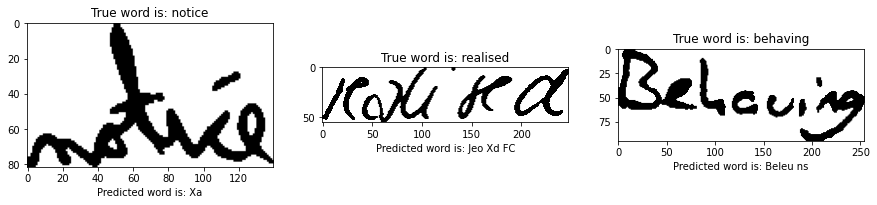

In [34]:
fig = plt.figure(figsize=(15, 13))
ax = []

for ind, path in enumerate(sorted(glob.glob('/content/demo/*.png'))):
    img = Image.open(path)
    with open(path[:-3] + 'txt', 'r') as f:
        word = f.read()
    pred = pytesseract.image_to_string(img, config="--oem 1 --psm 8 --lang eng -c page_separator=''")[:-1]
    ax.append(fig.add_subplot(1, 3, ind+1))
    ax[-1].set_title(f"True word is: {word}")
    ax[-1].set_xlabel(f"Predicted word is: {pred}")
    plt.imshow(img, cmap='gray')

plt.show()